In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# get data

In [5]:
data_dir = Path("C:\\Users\\Ela\\Documents\\SemesterB\\hebNLP\\project_new\\data\\final_tagged")

train_path = data_dir/"sentences_list_shuffled_tagged_topics_1_train.csv"
test_path = data_dir/"sentences_list_shuffled_tagged_topics_1_test.csv"
train_df = pd.read_csv(train_path, encoding="utf-8")
train_df.loc[:, "sentiment_tag"] = train_df.sentiment_tag.astype("category")
test_df = pd.read_csv(test_path, encoding="utf-8")
text = train_df["text"]
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   post_num       220 non-null    int64   
 1   post_idx       220 non-null    int64   
 2   text           220 non-null    object  
 3   topic_tag      220 non-null    int64   
 4   sentiment_tag  220 non-null    category
dtypes: category(1), int64(3), object(1)
memory usage: 7.3+ KB
None


# data exploration

In [6]:
def print_stats(train_df, test_df):
    print("train data")
    tot=len(train_df)
    print(train_df.sentiment_tag.value_counts())
    print(train_df.sentiment_tag.value_counts()/tot)
    print()
    print("train percentage:", len(train_df)/(len(train_df) + len(test_df)))
    print("test percentage:", len(test_df)/(len(train_df) + len(test_df)))

In [7]:
print_stats(train_df, test_df)

train data
 1    100
 0     77
-1     43
Name: sentiment_tag, dtype: int64
 1    0.454545
 0    0.350000
-1    0.195455
Name: sentiment_tag, dtype: float64

train percentage: 0.7006369426751592
test percentage: 0.29936305732484075


In [8]:
def plot_data_stats(train_df):
    plt.hist(train_df.sentiment_tag, density=True, label='train')
    plt.legend()


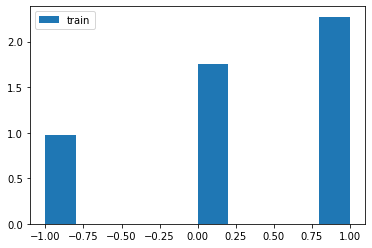

In [9]:
plot_data_stats(train_df)

In [10]:
def plot_character_length_histogram(text):
    text.str.len().\
        hist(range=(0,250))

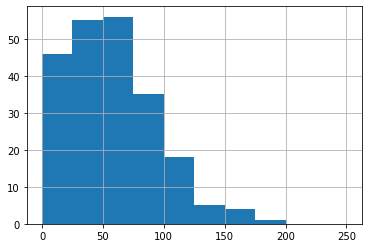

In [11]:
plot_character_length_histogram(train_df.text)

In [12]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(range=(0,60))

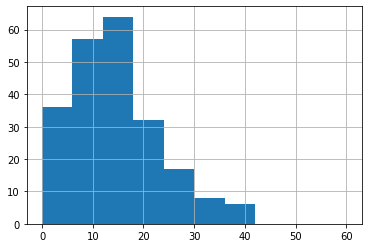

In [13]:
plot_word_number_histogram(train_df.text)

In [14]:
def get_hebrew_stopwords():
    stop_path=os.getcwd() + "/data/stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
#     res.append("נתניהו")    
    return res

In [15]:
def invert_words(words):
    return [w[::-1] for w in words]

In [16]:
stop=get_hebrew_stopwords()

In [20]:
import seaborn as sns
#from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text, stop):
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:60]:
        if (len(word)>1 and word not in stop):
            x.append(word)
            y.append(count)
        if len(x) >= 20:
            break
            
    sns.barplot(x=y,y=invert_words(x))
    plt.title('Top positive non stopwords for Trump dataset')
    plt.show()

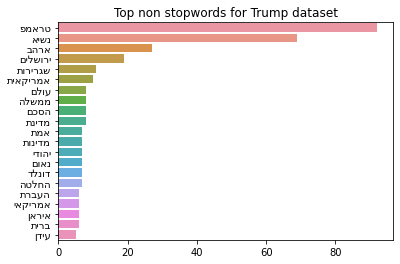

In [66]:
plot_top_non_stopwords_barchart(text, stop)

In [67]:
print(train_df[train_df.sentiment_tag==1].head())

    post_num  post_idx                                               text  \
2         10         0  ארהב ב הנהגת ה נשיא טראמפ מתייצבת מחדש ב הנהגת...   
4         56         5                      טוב ש יש ל אנחנו כ ה זה ידיד    
5         89         8       זו עצה ידידותית מ חבר ש מחזיק מקל גדול ב ידו   
8         45         4  חתם ה יום על ה חוק ה מחייב את מחלקת ה מדינה ה ...   
10        46         2                                         תודה ל אתה   

    topic_tag sentiment_tag  
2           1             1  
4           1             1  
5           1             1  
8           1             1  
10          1             1  


# Positive top words

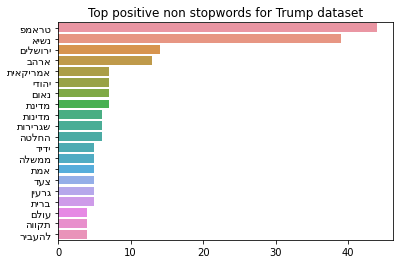

In [21]:
plot_top_non_stopwords_barchart(train_df[train_df.sentiment_tag==1].text, stop)

# Negative top words

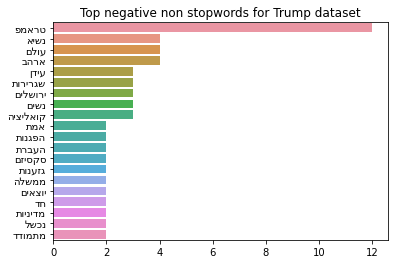

In [19]:
plot_top_non_stopwords_barchart(train_df[train_df.sentiment_tag==-1].text, stop)